#logistic regression for suv

In [1]:
import pandas as pd
df=pd.read_csv("suv_data.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [3]:
df.drop('User ID',axis=1,inplace=True)

In [4]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


<AxesSubplot:xlabel='Gender', ylabel='Purchased'>

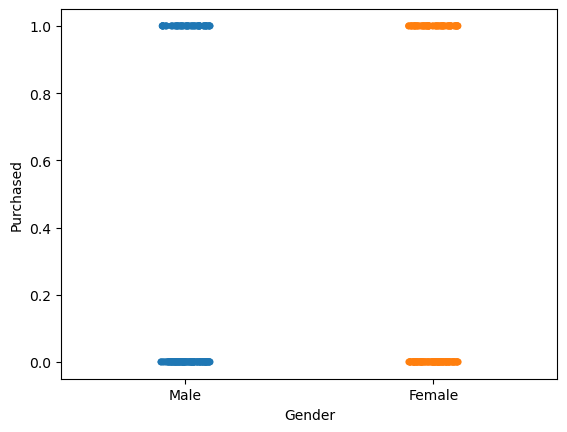

In [5]:
import seaborn as sns
sns.stripplot(x='Gender',y='Purchased',data=df)

In [6]:
gender=pd.get_dummies(df["Gender"],drop_first=True)
df["gender"]=gender

In [7]:
df

,Gender,Age,EstimatedSalary,Purchased,gender
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1
...,...,...,...,...,...
395,Female,46,41000,1,0
396,Male,51,23000,1,1
397,Female,50,20000,1,0
398,Male,36,33000,0,1


In [8]:
df.drop("Gender",axis=1)

,Age,EstimatedSalary,Purchased,gender
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


<AxesSubplot:xlabel='Purchased', ylabel='Gender'>

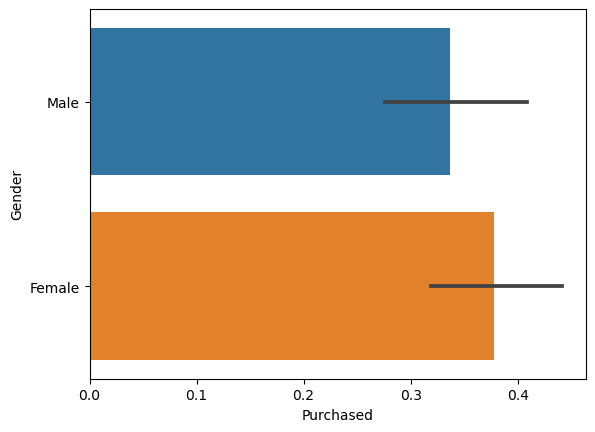

In [9]:
sns.barplot(x='Purchased',y='Gender',data=df)

In [10]:
df=df.drop("gender",axis=1)
df=df.drop("Gender",axis=1)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [11]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [12]:
df=df.drop("Gender",axis=1)
df

KeyError: "['Gender'] not found in axis"

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

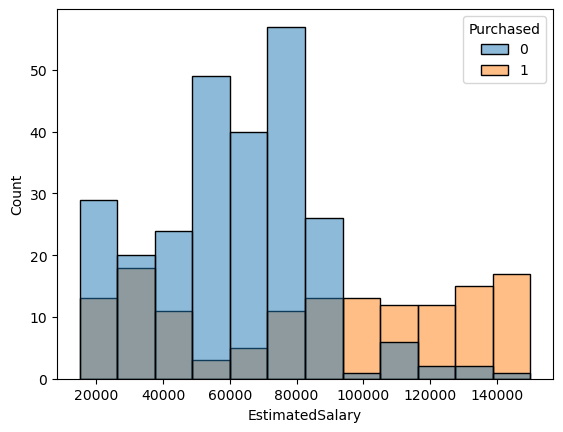

In [13]:
sns.histplot(x='EstimatedSalary',data=df,hue='Purchased')

In [14]:
df2=pd.read_csv("suv_data.csv")

<AxesSubplot:xlabel='Gender', ylabel='Count'>

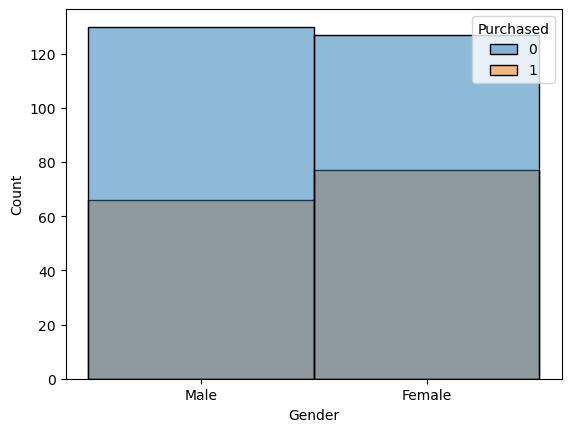

In [15]:
sns.histplot(x='Gender',data=df2,hue='Purchased')

In [16]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]
from sklearn import preprocessing
x= preprocessing.scale(x)
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [17]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x, y,test_size=0.25,random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [19]:
y_predicted=model.predict(xtest)

In [20]:
from sklearn.metrics import accuracy_score
score =accuracy_score(ytest,y_predicted)
score

0.83

In [21]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        58
           1       0.84      0.74      0.78        42

    accuracy                           0.83       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.83      0.83       100



In [22]:
#roc curve

In [23]:
from sklearn import metrics
ypredproba=model.predict_proba(xtest)[::,1]
ypredproba

array([4.94448816e-02, 2.37101513e-01, 6.18142237e-01, 7.85587831e-01,
       1.54213359e-01, 2.27019993e-01, 1.78132992e-03, 8.95428816e-01,
       9.42734560e-03, 9.82574386e-01, 1.39970194e-01, 3.35526971e-01,
       1.68376467e-01, 9.74112863e-01, 9.39218185e-01, 9.95745659e-01,
       9.86701586e-01, 1.96411218e-02, 7.45357254e-02, 9.93788890e-01,
       4.05152598e-01, 9.10954815e-01, 9.55972045e-01, 4.62626526e-01,
       2.18562197e-01, 2.82109519e-03, 9.17886310e-01, 8.23574290e-01,
       6.89199279e-01, 9.78408964e-01, 1.25966910e-01, 7.18066548e-03,
       8.63668028e-03, 9.64002147e-01, 5.42326649e-02, 8.58483103e-02,
       1.33177626e-03, 1.56299676e-01, 3.95335964e-01, 9.18480075e-04,
       9.80832978e-01, 9.90028668e-01, 4.80912816e-01, 1.14282784e-02,
       9.24354573e-01, 3.52029585e-01, 4.36599042e-01, 9.35920374e-01,
       3.91593337e-01, 6.76952127e-01, 1.02988232e-02, 1.26870191e-01,
       5.63383640e-01, 2.73921988e-01, 4.92947514e-01, 1.72943037e-01,
      

In [24]:
fpr, tpr, _ = metrics.roc_curve(ytest, ypredproba)
fpr


array([0.        , 0.        , 0.        , 0.01724138, 0.01724138,
       0.03448276, 0.03448276, 0.05172414, 0.05172414, 0.06896552,
       0.06896552, 0.0862069 , 0.0862069 , 0.10344828, 0.10344828,
       0.15517241, 0.15517241, 0.17241379, 0.17241379, 0.18965517,
       0.18965517, 0.22413793, 0.22413793, 0.25862069, 0.25862069,
       0.27586207, 0.27586207, 1.        ])

In [25]:
auc=metrics.roc_auc_score(ytest, ypredproba)
auc
#area under the curve

0.9129720853858785

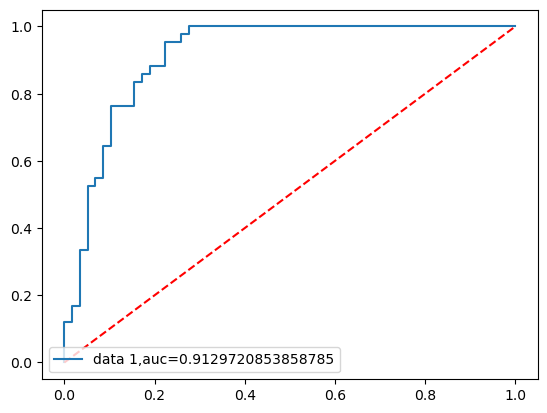

In [26]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.plot((0,1),(0,1),"r--")
plt.legend(loc=3)
plt.show()

In [27]:
#log loss
from sklearn.metrics import log_loss
y_p = model.predict_proba(xtest)
logloss=log_loss(ytest,y_p)
#print("logloss: %.2f" % (logloss))
print(logloss)

0.39838724933095704
